# Projeto 1 - Ciência dos Dados

Nome: Fernanda de Oliveira Pereira

Nome: Marlon Silva Pereira

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Marlon\Desktop\2º sem\Ciência dos Dados\Projeto 1


Carregando a base de dados com os tweets classificados como relevantes e não relevantes:

In [3]:
filename = 'Iphone 13.xlsx'

In [4]:
train = pd.read_excel(filename)
train.head(10)

,Treinamento,Relevância
0,que palhaçada é essa do iphone 13,0
1,não aguento mais esperar sair o iphone 13 pra ...,1
2,o iphone 13 é q podia se despachar a sair,1
3,#apple pode vir a ter problemas para produzir ...,0
4,#apple marca evento para 14 de setembro - #iph...,0
5,gente vocês vão dar 15 conto no iphone 13? sei...,1
6,"eu mal comprei o iphone 12, a apple já tá me m...",1
7,meu pai preocupado que sumiu “alguns” sacos de...,0
8,"@13numb acho q este ano não vão dropar, setemb...",0
9,"@erick_tiago_ meu primo trabalha na apple, ess...",0


In [5]:
test = pd.read_excel(filename, sheet_name = 'Teste')
test.head(5)

,Teste,Relevância
0,"desculpa, mas eu fui no google procurar se o i...",1
1,"iphone 13: poucos dias antes do lançamento, co...",0
2,iphone 13 ta vindo já kkkk só falta eu comprar...,0
3,@pnuke333 @louise_mattoss @baby50644057 oloco ...,0
4,o povo falando que o whatsapp vai parar de fun...,0


___
## Classificador automático de sentimento


Faça aqui uma descrição do seu produto e o que considerou como relevante ou não relevante na classificação dos tweets.

 O Iphone 13 é um novo modelo de celular da Apple. Consideramos relevante os tweets que expressam uma opinão crítica ou elogio. Desconsideram os comentário que faziam piadas, eram referentes a páginas de notícias ou conversas aleatórias entre usuários que citavam o produto.

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [6]:
import re 

def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    #import string
    punctuation = '[!-.:?;/@"]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed

def cleanup_palavras(list):
    filtro = ['https']
    
    #Loop para encotrar palavra com 2 letras ou menos e adicionar no filtro
    for i in list:
        if len(i) <= 2:
            filtro.append(i)
    
    #Verifica se as palavras da lista não estão no filtro, se sim elas não são adicionadas
    list = [palavra for palavra in list if palavra not in filtro]
    return list

#Filtrando as palavras dos tweets relevantes da lista de treinamento
tabela_r = train.loc[(train['Relevância'] == 1)]
lista_r = tabela_r['Treinamento'].tolist()

all_tweets_r = ''
for i in lista_r:
    all_tweets_r += i

tweets_r = cleanup(all_tweets_r.lower())

todas_as_palavras_r = tweets_r.split()

todas_as_palavras_r = cleanup_palavras(todas_as_palavras_r)

#Criando tabela relativa com todas as palvras dos tweets relevantes da lista de treinamento
serie_tweets_r = pd.Series(todas_as_palavras_r)
tabela_tweets_r_relativo = serie_tweets_r.value_counts(True)

In [7]:
#Filtrando as palavras dos tweets irrelevantes da lista de treinamento
tabela_i = train.loc[(train['Relevância'] == 0)]
lista_i = tabela_i['Treinamento'].tolist()

all_tweets_i = ''
for i in lista_i:
    all_tweets_i += i

tweets_i = cleanup(all_tweets_i.lower())

todas_as_palavras_i = tweets_i.split()

todas_as_palavras_i = cleanup_palavras(todas_as_palavras_i)

#Criando tabela relativa com todas as palvras dos tweets relevantes da lista de treinamento
serie_tweets_i = pd.Series(todas_as_palavras_i)
tabela_tweets_i_relativo = serie_tweets_i.value_counts(True)

In [8]:
#Filtrando as palavras de todos os tweets da lista de treinamento
todas_as_palavras = todas_as_palavras_i + todas_as_palavras_r
todas_as_palavras = cleanup_palavras(todas_as_palavras)

#Criando tabela relativa com todas as palvras dos tweets da lista de treinamento
serie_tweets = pd.Series(todas_as_palavras)
tabela_tweets_relativo = serie_tweets.value_counts(True)

In [9]:
#Função que classifica cada tweet
def teste (tweet):
    #Filtrando e separando as palavras do tweet
    texto = tweet
    texto = cleanup(texto.lower())
    tweet_lista = texto.split()
    
    tweet_filtrado = []
    for i in tweet_lista:
        if len(i) >= 2:
            tweet_filtrado.append(i)
    
    #Cálculo das probabilidades do tweet ser relevante ou irrelevante
    a = serie_tweets_r.shape[0]
    b = serie_tweets_i.shape[0]
    
    probR = a/(a+b)
    probI = b/(a+b)
    probTweetDadoR = 1
    probTweetDadoI = 1
    for palavra in tweet_filtrado:
        if palavra in todas_as_palavras_r:
            probTweetDadoR = probTweetDadoR * tabela_tweets_r_relativo[palavra]
        if palavra in todas_as_palavras_i:
            probTweetDadoI = probTweetDadoI * tabela_tweets_i_relativo[palavra]
    ProbRtweet = probTweetDadoR * probR
    ProbItweet = probTweetDadoI * probI
    
    #Classifica o tweet como relevante ou irrelevante dependendo de qual probabilidade for maior
    if ProbRtweet < ProbItweet:
        resposta = 1
    else:
        resposta = 0
    return resposta

___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

In [10]:
#Testando a performance do Classificador com os tweets da tabela de teste
tabela_resultado = test
resultados = []
for i in range(0,200):
    resultados.append(teste(tabela_resultado['Teste'][i]))
tabela_resultado['Resultados do teste'] = resultados

In [11]:
#Verificando a ocorrência de Verdadeiros Positivos, Falsos Positivos, Verdadeiros Negativos e Falsos Negativos
somaVerdadeirosPositivos = 0
somaFalsosPositivos = 0
somaVerdadeirosNegativos = 0
somaFalsosNegativos = 0
for i in range(0,200):
    if tabela_resultado['Relevância'][i] == 1 and tabela_resultado['Resultados do teste'][i] == 1:
        somaVerdadeirosPositivos += 1
    if tabela_resultado['Relevância'][i] == 0 and tabela_resultado['Resultados do teste'][i] == 1:
        somaFalsosPositivos += 1
    if tabela_resultado['Relevância'][i] == 0 and tabela_resultado['Resultados do teste'][i] == 0:
        somaVerdadeirosNegativos += 1
    if tabela_resultado['Relevância'][i] == 1 and tabela_resultado['Resultados do teste'][i] == 0:
        somaFalsosNegativos += 1
total = somaVerdadeirosPositivos + somaFalsosPositivos + somaVerdadeirosNegativos + somaFalsosNegativos 

#Cálculo da porcentagem de cada ocorrência
VerdadeirosPositivos = somaVerdadeirosPositivos/total
FalsosPositivos = somaFalsosPositivos/total
VerdadeirosNegativos = somaVerdadeirosNegativos/total
FalsosNegativos = somaFalsosNegativos/total
#Cálcul da acurácia do Classificador
acuracia = VerdadeirosPositivos + VerdadeirosNegativos
print("VerdadeirosPositivos: {0:.2f}%".format(VerdadeirosPositivos*100))
print("FalsosPositivos: {0:.2f}%".format(FalsosPositivos*100))
print("VerdadeirosNegativos: {0:.2f}%".format(VerdadeirosNegativos*100))
print("FalsosNegativos: {0:.2f}%".format(FalsosNegativos*100))
print("Acurácia: {0:.2f}%".format(acuracia*100))

VerdadeirosPositivos: 13.50%
FalsosPositivos: 19.00%
VerdadeirosNegativos: 42.00%
FalsosNegativos: 25.50%
Acurácia: 55.50%


___
### Concluindo

Por conterem no geral palavras que estão mais presentes em tweets relevantes, o classificador não consegue analisar de forma correta tweets com dupla negação ou sarcasmo, pois isso exigiria uma abordagem interpretativo do texto, diferente do simples cálculo de probabilidade usado pelo classificador.

Os resultados obtidos pelo classificador criado sobre o novo lançamento da Apple "Iphone 13" traz uma base completa sobre os pontos favoráveis e desfavoráveis apresentados pelo produto. A partir disso, é possível ampliar a captura da base de dados para aperfeiçoar a acurácia do classificador, e também é possível detalhar as categorias de relevância baseado nas probabilidades calculadas para uma melhor visualização dos resultados.

Não podemos alimentar nossa base de treinamento automaticamente usando o próprio classificador, aplicado a novos tweets, porque dessa forma o classificador iria propagar os erros e acertos aprendidos com a antiga base de dados, podendo dessa forma reduzir sua acurácia. Para que isso não ocorra, é necessário que a nova base de dados seja previamente classificada manualmente, para assim possibilitar o aumento da acurácia do classificador.

Assim como usado em nosso projeto, o classificador Naive-Bayes pode ser aplicado em diversos cenários de uso, como exemplo de filtros para mensagens ou e-mails como spam, construir um sistema de recomendações que filtra dados para prever os gostos do usúario de um app ou rede social, calcular possibilidades de pontuações e vitórias em apostas esportivas etc.

Algumas melhorias que podem ser aplicadas ao classificador são:
<br>
    Para aumentar a acurácia de nosso classificador é preciso aumentar a base de dados para seu treinamento, e essa base precisa ser calibrada manualmente para garantir o acerto.
<br>
    É possível aumentar o detalhamento da análise classificando diferentes ordens de relevância para os tweets a partir das probabilidades cálculadas, classificando como "muito relevantes" tweets com uma maior probabilidade de serem relevantes, e como "pouco relevantes" tweets com uma menor probabilidade de serem relevantes.

___
### Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste

Caso for fazer esse item do Projeto

In [12]:
#Import da função random para sortear os tweets das tabelas de treinamento e teste
import random

#Lista para armazenar os valores de acurácias obtidas em cada teste
lista_acuracia=[]

#Contador para rodar o looping de testes
contador = 0

#Looping para testar o Classificador 100 vezes
while contador<100:
    
    #Agrupando aleatóriamente os tweets em novas tabelas de treinamento e teste
    todos_tweets = []
    todos_tweets_relevancia = []
    for i in range(0,200):
        todos_tweets.append(test['Teste'][i])
        todos_tweets_relevancia.append(test['Relevância'][i])
    for i in range(0,300):
        todos_tweets.append(train['Treinamento'][i])
        todos_tweets_relevancia.append(train['Relevância'][i])
    tweet_e_ralevancia = []
    for i in range(0,499):
        tweet_e_ralevancia.append([todos_tweets[i],todos_tweets_relevancia[i]])
    random.shuffle(tweet_e_ralevancia)

    new_train_list = []
    new_test_list = []
    for i in range(0,499):
        if i <= 199:
            new_train_list.append(tweet_e_ralevancia[i])
        else:
            new_test_list.append(tweet_e_ralevancia[i])
    
   #Criando a nova tabela de treinamento
    new_train_list_tweets = []
    new_train_list_relevancia = []
    for i in range(0,199):
        new_train_list_tweets.append(new_train_list[i][0])
        new_train_list_relevancia.append(new_train_list[i][1])
    serie_new_train = pd.Series(new_train_list_tweets)
    tabela_new_train = serie_new_train.to_frame(name='Treinamento')
    tabela_new_train['Relevância'] = new_train_list_relevancia

    #Criando a nova tabela de teste
    new_test_list_tweets = []
    new_test_list_relevancia = []
    for i in range(0,200):
        new_test_list_tweets.append(new_test_list[i][0])
        new_test_list_relevancia.append(new_test_list[i][1])
    serie_new_test = pd.Series(new_test_list_tweets)
    tabela_new_test = serie_new_test.to_frame(name='Teste')
    tabela_new_test['Relevância'] = new_test_list_relevancia

    #Repetição do processo de criar as listas de palavras relevantes, irrelevantes e de todas para os tweets da nova lista de treinamento
    tabela_r = tabela_new_train.loc[(tabela_new_train['Relevância'] == 1)]
    lista_r = tabela_r['Treinamento'].tolist()
    all_tweets_r = ''
    for i in lista_r:
        all_tweets_r += i
    tweets_r = cleanup(all_tweets_r.lower())
    todas_as_palavras_r = tweets_r.split()
    todas_as_palavras_r = cleanup_palavras(todas_as_palavras_r)
    serie_tweets_r = pd.Series(todas_as_palavras_r)
    tabela_tweets_r_relativo = serie_tweets_r.value_counts(True)

    tabela_i = tabela_new_train.loc[(tabela_new_train['Relevância'] == 0)]
    lista_i = tabela_i['Treinamento'].tolist()
    all_tweets_i = ''
    for i in lista_i:
        all_tweets_i += i
    tweets_i = cleanup(all_tweets_i.lower())
    todas_as_palavras_i = tweets_i.split()
    todas_as_palavras_i = cleanup_palavras(todas_as_palavras_i)
    serie_tweets_i = pd.Series(todas_as_palavras_i)
    tabela_tweets_i_relativo = serie_tweets_i.value_counts(True)

    todas_as_palavras = todas_as_palavras_i + todas_as_palavras_r
    todas_as_palavras = cleanup_palavras(todas_as_palavras)
    serie_tweets = pd.Series(todas_as_palavras)
    tabela_tweets_relativo = serie_tweets.value_counts(True)
    a = serie_tweets_r.shape[0]
    b = serie_tweets_i.shape[0]
    
    #Classificando os tweets da tabela de teste
    tabela_resultado = tabela_new_test
    resultados = []
    for i in range(0,200):
        texto = tabela_resultado['Teste'][i]
        texto = cleanup(texto.lower())
        tweet_lista = texto.split()

        tweet_filtrado = []
        for i in tweet_lista:
            if len(i) >= 2:
                tweet_filtrado.append(i)

        probR = a/(a+b)
        probI = b/(a+b)
        probTweetDadoR = 1
        probTweetDadoI = 1
        for palavra in tweet_filtrado:
            if palavra in todas_as_palavras_r:
                probTweetDadoR = probTweetDadoR * tabela_tweets_r_relativo[palavra]
            if palavra in todas_as_palavras_i:
                probTweetDadoI = probTweetDadoI * tabela_tweets_i_relativo[palavra]
        ProbRtweet = probTweetDadoR * probR
        ProbItweet = probTweetDadoI * probI
        if ProbRtweet < ProbItweet:
            resposta = 1
        else:
            resposta = 0
        resultados.append(resposta)
    tabela_resultado['Resultados do teste'] = resultados

    #Verificando a ocorrência de Verdadeiros Positivos, Falsos Positivos, Verdadeiros Negativos e Falsos Negativos
    somaVerdadeirosPositivos = 0
    somaFalsosPositivos = 0
    somaVerdadeirosNegativos = 0
    somaFalsosNegativos = 0
    for i in range(0,200):
        if tabela_resultado['Relevância'][i] == 1 and tabela_resultado['Resultados do teste'][i] == 1:
            somaVerdadeirosPositivos += 1
        if tabela_resultado['Relevância'][i] == 0 and tabela_resultado['Resultados do teste'][i] == 1:
            somaFalsosPositivos += 1
        if tabela_resultado['Relevância'][i] == 0 and tabela_resultado['Resultados do teste'][i] == 0:
            somaVerdadeirosNegativos += 1
        if tabela_resultado['Relevância'][i] == 1 and tabela_resultado['Resultados do teste'][i] == 0:
            somaFalsosNegativos += 1
    total = somaVerdadeirosPositivos + somaFalsosPositivos + somaVerdadeirosNegativos + somaFalsosNegativos 
    
    #Cálculo da porcentagem de cada ocorrência
    VerdadeirosPositivos = somaVerdadeirosPositivos/total
    FalsosPositivos = somaFalsosPositivos/total
    VerdadeirosNegativos = somaVerdadeirosNegativos/total
    FalsosNegativos = somaFalsosNegativos/total
    
    #Cálcul da acurácia do Classificador
    acuracia = VerdadeirosPositivos + VerdadeirosNegativos
    lista_acuracia.append(acuracia)
    
    #Atualização do contador para iniciar um novo teste
    contador += 1

Text(0.5, 0, 'Acurácia')

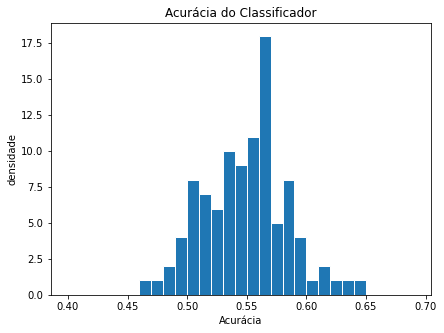

In [13]:
#Plotagem do histograma com os valores obtidos de acurácia para cada teste do Classificador
faixa = np.arange(0.4,0.7,0.01)

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(lista_acuracia, bins=faixa, edgecolor='white')
plt.title('Acurácia do Classificador')
plt.ylabel('densidade')
plt.xlabel('Acurácia')

Com a análise do histograma, é possível concluir que temos uma clara desvantagem ao construir um
Classificador considerando uma única vez a divisão da base de dados em treinamento e em
teste, pois a acurácia do Classificador pode variar muito dependendo da base de dados. Dessa forma, ao se basear em um único agrupamento de dados, podemos obter tanto uma acurácia que supera os 60%, quanto uma que seja menor que 50%.

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nos tweets. Ex: stemming, lemmatization, stopwords
* CORRIGIU separação de espaços entre palavras e emojis ou entre emojis e emojis
* CRIOU categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante. Pelo menos quatro categorias, com adição de mais tweets na base, conforme enunciado. (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item 6. Qualidade do Classificador a partir de novas separações dos tweets entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**